In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [109]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target - 1
i = 0
while i < 50:
    Y = np.delete(Y, 0)
    i=i+1
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [110]:
i = 0
while i < 50:
    X = np.delete(X, 0, axis = 0)
    i=i+1
X

array([[7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.2, 2.7],
       [5. , 2. ],
       [5.9, 3. ],
       [6. , 2.2],
       [6.1, 2.9],
       [5.6, 2.9],
       [6.7, 3.1],
       [5.6, 3. ],
       [5.8, 2.7],
       [6.2, 2.2],
       [5.6, 2.5],
       [5.9, 3.2],
       [6.1, 2.8],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.4, 2.9],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.7, 2.6],
       [5.5, 2.4],
       [5.5, 2.4],
       [5.8, 2.7],
       [6. , 2.7],
       [5.4, 3. ],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [5.6, 3. ],
       [5.5, 2.5],
       [5.5, 2.6],
       [6.1, 3. ],
       [5.8, 2.6],
       [5. , 2.3],
       [5.6, 2.7],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.1, 2.5],
       [5.7, 2.8],
       [6.3, 3.3],
       [5.8, 2.7],
       [7.1,

## LogisticRegression из библиотеки Skillet Learn

In [6]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

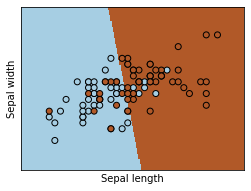

In [7]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Обычный градиентный спуск

In [8]:
logreg.score(X, Y)

0.75

In [63]:
def gradient_descent(alpha, x, y, numIterations):  
    m = x.shape[0] 
    theta = np.ones(3) 
    x_transpose = x.transpose()
    
    for iter in range( 0, numIterations ):
        step1 = np.dot(x, theta)
        hypothesis = 1/ (1 + np.exp(-step1)) 
        
        
        h_t = hypothesis.transpose()
        
        loss = hypothesis - y
        logloss = ((y-1)* np.log((1-hypothesis))) - (y * np.log((hypothesis)))
                                                   
        J = np.sum(logloss)/m      
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m 
        theta = theta - alpha * gradient  # update
    
    return theta

In [64]:
X1 = np.c_[ np.ones(100), X] #добавим в каждую строку единицу для вычисления сводбожного члена
alpha = 0.01
theta1 = gradient_descent(alpha, X1, Y, 1000)

iter 0 | J: 4.853
iter 1 | J: 4.743
iter 2 | J: 4.634
iter 3 | J: 4.524
iter 4 | J: 4.414
iter 5 | J: 4.304
iter 6 | J: 4.195
iter 7 | J: 4.085
iter 8 | J: 3.975
iter 9 | J: 3.866
iter 10 | J: 3.756
iter 11 | J: 3.647
iter 12 | J: 3.537
iter 13 | J: 3.428
iter 14 | J: 3.318
iter 15 | J: 3.209
iter 16 | J: 3.100
iter 17 | J: 2.991
iter 18 | J: 2.882
iter 19 | J: 2.774
iter 20 | J: 2.666
iter 21 | J: 2.558
iter 22 | J: 2.451
iter 23 | J: 2.344
iter 24 | J: 2.238
iter 25 | J: 2.133
iter 26 | J: 2.030
iter 27 | J: 1.927
iter 28 | J: 1.827
iter 29 | J: 1.728
iter 30 | J: 1.632
iter 31 | J: 1.540
iter 32 | J: 1.450
iter 33 | J: 1.365
iter 34 | J: 1.285
iter 35 | J: 1.210
iter 36 | J: 1.140
iter 37 | J: 1.077
iter 38 | J: 1.021
iter 39 | J: 0.971
iter 40 | J: 0.927
iter 41 | J: 0.890
iter 42 | J: 0.858
iter 43 | J: 0.832
iter 44 | J: 0.810
iter 45 | J: 0.793
iter 46 | J: 0.778
iter 47 | J: 0.767
iter 48 | J: 0.758
iter 49 | J: 0.751
iter 50 | J: 0.745
iter 51 | J: 0.740
iter 52 | J: 0.737
ite

In [116]:
theta1

array([ 0.53457523, -0.14337811,  0.16202564])

In [42]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

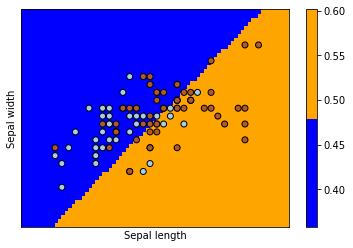

In [117]:
b = np.arange(x_min, x_max, h)
d = np.arange(y_min, y_max, h)

B, D = np.meshgrid(b, d)
nu = 1/ (1 + np.exp(theta1[0:1]+theta1[1:2]*B+theta1[2:]*D))
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
cmap = ListedColormap(['blue', 'orange'])
bounds=[0,0.5,1]
norm = BoundaryNorm(bounds, cmap.N)
plt.pcolormesh(B, D, nu,cmap=cmap)
plt.colorbar()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Nesterov-momentum (Ускоренный градиентный спуск)

In [111]:
def nesterov (alpha, gamma, x, y, numIterations):  
    m = x.shape[0] 
    vt = np.zeros(3)
    theta = np.ones(3)
    theta_temp = np.ones(3)
    x_transpose = x.transpose()
    
    for iter in range( 0, numIterations ):
        theta_temp = theta + vt * gamma
        step1 = np.dot(x, theta_temp)
        hypothesis = 1/ (1 + np.exp(-step1)) 
        h_t = hypothesis.transpose()
        
        loss = hypothesis - y
        logloss = ((y-1)* np.log((1-hypothesis))) - (y * np.log((hypothesis)))
                                                   
        J = np.sum(logloss)/m      
        
        print( "iter %s | J: %.3f" % (iter, J) )
        #print(step1)
        
        gradient = np.dot(x_transpose, loss) / m 
        theta = theta_temp - alpha * gradient
        vt = gamma*vt + alpha * gradient
        
    return theta

In [115]:
alpha = 0.01
gamma = 0.03
theta2 = nesterov (alpha,gamma, X1, Y, 1000)

iter 0 | J: 4.853
iter 1 | J: 4.747
iter 2 | J: 4.640
iter 3 | J: 4.534
iter 4 | J: 4.428
iter 5 | J: 4.321
iter 6 | J: 4.215
iter 7 | J: 4.109
iter 8 | J: 4.002
iter 9 | J: 3.896
iter 10 | J: 3.790
iter 11 | J: 3.684
iter 12 | J: 3.578
iter 13 | J: 3.472
iter 14 | J: 3.366
iter 15 | J: 3.260
iter 16 | J: 3.154
iter 17 | J: 3.048
iter 18 | J: 2.943
iter 19 | J: 2.838
iter 20 | J: 2.733
iter 21 | J: 2.628
iter 22 | J: 2.524
iter 23 | J: 2.420
iter 24 | J: 2.317
iter 25 | J: 2.214
iter 26 | J: 2.113
iter 27 | J: 2.013
iter 28 | J: 1.914
iter 29 | J: 1.817
iter 30 | J: 1.721
iter 31 | J: 1.629
iter 32 | J: 1.539
iter 33 | J: 1.452
iter 34 | J: 1.370
iter 35 | J: 1.291
iter 36 | J: 1.218
iter 37 | J: 1.150
iter 38 | J: 1.088
iter 39 | J: 1.032
iter 40 | J: 0.982
iter 41 | J: 0.939
iter 42 | J: 0.901
iter 43 | J: 0.868
iter 44 | J: 0.841
iter 45 | J: 0.819
iter 46 | J: 0.800
iter 47 | J: 0.785
iter 48 | J: 0.772
iter 49 | J: 0.762
iter 50 | J: 0.754
iter 51 | J: 0.748
iter 52 | J: 0.743
ite

In [118]:
theta2

array([ 0.54244832, -0.14777638,  0.16892056])

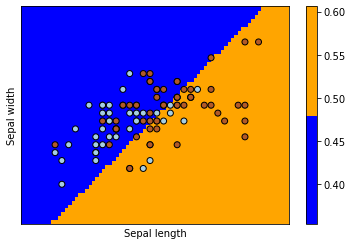

In [119]:
b = np.arange(x_min, x_max, h)
d = np.arange(y_min, y_max, h)

B, D = np.meshgrid(b, d)
nu = 1/ (1 + np.exp(theta2[0:1]+theta2[1:2]*B+theta2[2:]*D))
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
cmap = ListedColormap(['blue', 'orange'])
bounds=[0,0.5,1]
norm = BoundaryNorm(bounds, cmap.N)
plt.pcolormesh(B, D, nu,cmap=cmap)
plt.colorbar()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## RMSProp

In [93]:
def RMSprop (mu, gamma, x, y, numIterations):  
    m = x.shape[0] 
    vt = np.zeros(3)
    e=0.000000001
    theta = np.ones(3)
    x_transpose = x.transpose()
    
    for iter in range( 0, numIterations ):
        step1 = np.dot(x, theta)
        hypothesis = 1/ (1 + np.exp(-step1)) 
        h_t = hypothesis.transpose()
        
        loss = hypothesis - y
        logloss = ((y-1)* np.log((1-hypothesis))) - (y * np.log((hypothesis)))
                                                   
        J = np.sum(logloss)/m      
        
        print( "iter %s | J: %.3f" % (iter, J) )
        #print(step1)
        
        gradient = np.dot(x_transpose, loss) / m 
        vt = gamma*vt + (1 - gamma) * gradient * gradient
        alpha = mu / ((vt**0.5)+e)
        theta = theta - alpha * gradient
        
        
    return theta

In [128]:
alpha = 0.01
gamma = 0.03
theta3 = RMSprop (alpha,gamma, X1, Y, 1000)

iter 0 | J: 4.853
iter 1 | J: 4.804
iter 2 | J: 4.755
iter 3 | J: 4.707
iter 4 | J: 4.658
iter 5 | J: 4.610
iter 6 | J: 4.561
iter 7 | J: 4.513
iter 8 | J: 4.464
iter 9 | J: 4.416
iter 10 | J: 4.367
iter 11 | J: 4.319
iter 12 | J: 4.270
iter 13 | J: 4.222
iter 14 | J: 4.173
iter 15 | J: 4.125
iter 16 | J: 4.076
iter 17 | J: 4.028
iter 18 | J: 3.979
iter 19 | J: 3.931
iter 20 | J: 3.882
iter 21 | J: 3.834
iter 22 | J: 3.785
iter 23 | J: 3.737
iter 24 | J: 3.688
iter 25 | J: 3.640
iter 26 | J: 3.591
iter 27 | J: 3.543
iter 28 | J: 3.494
iter 29 | J: 3.446
iter 30 | J: 3.397
iter 31 | J: 3.349
iter 32 | J: 3.300
iter 33 | J: 3.252
iter 34 | J: 3.204
iter 35 | J: 3.155
iter 36 | J: 3.107
iter 37 | J: 3.059
iter 38 | J: 3.010
iter 39 | J: 2.962
iter 40 | J: 2.914
iter 41 | J: 2.865
iter 42 | J: 2.817
iter 43 | J: 2.769
iter 44 | J: 2.721
iter 45 | J: 2.673
iter 46 | J: 2.625
iter 47 | J: 2.577
iter 48 | J: 2.529
iter 49 | J: 2.481
iter 50 | J: 2.433
iter 51 | J: 2.385
iter 52 | J: 2.337
ite

In [129]:
theta3

array([-4.7267386 ,  0.73400145,  0.0428263 ])

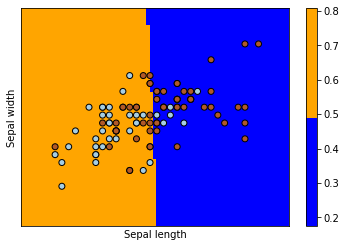

In [130]:
b = np.arange(x_min, x_max, h)
d = np.arange(y_min, y_max, h)

B, D = np.meshgrid(b, d)
nu = 1/ (1 + np.exp(theta3[0:1]+theta3[1:2]*B+theta3[2:]*D))
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
cmap = ListedColormap(['blue', 'orange'])
bounds=[0,0.5,1]
norm = BoundaryNorm(bounds, cmap.N)
plt.pcolormesh(B, D, nu,cmap=cmap)
plt.colorbar()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()